In [2]:
import pandas as pd
import numpy as np
import AD_comparison_tools
import AD_predictor_tools
import PlottingTools
import protfasta 

In [3]:
uniprot_high_qual_ADs = pd.read_csv("../data/UniprotActivationDomains_HighqualitySet.csv")
uniprot_high_qual_ADs = uniprot_high_qual_ADs[["Gene ", "AD name", "Start", "End", "uniprotID", "Reference", "Sequence"]]
uniprot_high_qual_ADs

,Gene,AD name,Start,End,uniprotID,Reference,Sequence
0,MEIS1,NaN,335,390,O00470,R4TA_regions.txt,IDQSNRAVSQGTPYNPDGQPMGGFVMDGQQHMGIRAPGPMSGMGMN...
1,SOX12,NaN,283,315,O15370,R4TA_regions.txt,SHFEFPDYCTPEVTEMIAGDWRPSSIADLVFTY
2,SOX11,NaN,409,441,P35716,R4TA_regions.txt,SHFEFPDYCTPELSEMIAGDWLEANFSDLVFTY
3,ZXDA,NaN,572,699,P98168,R4TA_regions.txt,QDLLAQLEAANSLTPSSELTSQRQNDLSDAEIVSLFSDVPDSTSAA...
4,ZXDB,NaN,576,703,P98169,R4TA_regions.txt,QDLLAQLEAANSLTPSSELTSQRQNDLSDAEIVSLFSDVPDSTSAA...
...,...,...,...,...,...,...,...
125,NR3C1,NaN,98,115,P04150,transcriptionalactivity_regions.txt,MGNDLGFPQQGQISLSSG
126,SOX11,NaN,409,441,P35716,transcriptionalactivity_regions.txt,SHFEFPDYCTPELSEMIAGDWLEANFSDLVFTY
127,AHR,NaN,118,126,P35869,transcriptionalactivity_regions.txt,LLQALNGFV
128,AHR,NaN,266,268,P35869,transcriptionalactivity_regions.txt,FAI


In [4]:
human_ADs = pd.read_csv("../data/ActivationDomainsHuman.csv")
human_ADs = human_ADs[human_ADs['Start'].notna()]
human_ADs = human_ADs[human_ADs['End'].notna()]
human_ADs = human_ADs[["Gene ", "AD name", "Start", "End", "uniprotID", "Reference", "Sequence"]]
human_ADs

,Gene,AD name,Start,End,uniprotID,Reference,Sequence
0,OTX2,Cterm,231,289.0,P32243,uniprot,LNQSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFNADCLD...
1,CRX,Cterm,200,284.0,O43186,Chen 2002 pg 873,AFCSSPSAYGSPSSYFSGLDPYLSPMVPQLGGPALSPLSGPSVGPS...
2,VP16,Full,411,490.0,P06492,NaN,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG...
3,VP16,H1,411,456.0,P06492,NaN,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG
4,VP16,MVS N_C (acid blob library fragment,418,456.0,P06492,NaN,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP
...,...,...,...,...,...,...,...
83,CEBPB,NaN,24,124.0,P17676,Choi 2000 list,MEVANFYYEADCLAAAYGGKAAPAAPPAARPGPRPPAGELGSIGDH...
84,PU.1/SPI1,NaN,13,90.0,P17947,Choi 2000 list,VPPPSEDLVPYDTDLYQRQTHEYYPYLSSDGESHSDHYWDFHPHHV...
85,CREB1,Qrich,151,238.0,P16220,Choi 2000 list,ITTVTVPTPIYQTSSGQYIAITQGGAIQLANNGTDGVQGLQTLTMT...
86,NFE2,NaN,1,80.0,Q16621,Choi 2000 list,MSPCPPQQSRNRVIQLSTSELGEMELTWQEIMSITELQGLNAPSEP...


In [32]:
uniprot_high_qual_ADs['Start'] = uniprot_high_qual_ADs['Start'].astype(int)
uniprot_high_qual_ADs['End'] = uniprot_high_qual_ADs['End'].astype(int)

human_ADs['Start'] = human_ADs['Start'].astype(int)
human_ADs['End'] = human_ADs['End'].astype(int)

In [33]:
both_lists = pd.concat([human_ADs, uniprot_high_qual_ADs])
both_lists = both_lists.rename(columns = {"Gene " : "GeneName"})
both_lists = both_lists.reset_index()
both_lists["orig_uniprotID"] = both_lists["uniprotID"]
both_lists

,index,GeneName,AD name,Start,End,uniprotID,Reference,Sequence,orig_uniprotID
0,0,OTX2,Cterm,231,289,P32243,uniprot,LNQSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFNADCLD...,P32243
1,1,CRX,Cterm,200,284,O43186,Chen 2002 pg 873,AFCSSPSAYGSPSSYFSGLDPYLSPMVPQLGGPALSPLSGPSVGPS...,O43186
2,2,VP16,Full,411,490,P06492,NaN,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG...,P06492
3,3,VP16,H1,411,456,P06492,NaN,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG,P06492
4,4,VP16,MVS N_C (acid blob library fragment,418,456,P06492,NaN,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,P06492
...,...,...,...,...,...,...,...,...,...
213,125,NR3C1,NaN,98,115,P04150,transcriptionalactivity_regions.txt,MGNDLGFPQQGQISLSSG,P04150
214,126,SOX11,NaN,409,441,P35716,transcriptionalactivity_regions.txt,SHFEFPDYCTPELSEMIAGDWLEANFSDLVFTY,P35716
215,127,AHR,NaN,118,126,P35869,transcriptionalactivity_regions.txt,LLQALNGFV,P35869
216,128,AHR,NaN,266,268,P35869,transcriptionalactivity_regions.txt,FAI,P35869


In [34]:
# Adding sequences
both_lists[["uniprotID"]].to_csv("../data/GSL_parts_uniprots.txt", 
                                                 header=None, index=None, sep=' ', mode='a')

In [35]:
all_isoform_seqs = protfasta.read_fasta("../data/GSL_parts_uniprotID_isoform_seqs.txt")
isoform_df = pd.DataFrame({"id":all_isoform_seqs.keys(),
             "seq":all_isoform_seqs.values()})
isoform_df["uniprotID"] = isoform_df["id"].str.split("|").str[1]
isoform_df

,id,seq,uniprotID
0,sp|O00470|MEIS1_HUMAN Homeobox protein Meis1 O...,MAQRYDDLPHYGGMDGVGIPSTMYGDPHAARSMQPVHHLNHGPPLH...,O00470
1,sp|O00470-2|MEIS1_HUMAN Isoform 2 of Homeobox ...,MQYDDLPHYGGMDGVGIPSTMYGDPHAARSMQPVHHLNHGPPLHSH...,O00470-2
2,sp|O00716|E2F3_HUMAN Transcription factor E2F3...,MRKGIQPALEQYLVTAGGGEGAAVVAAAAAASMDKRALLASPGFAA...,O00716
3,sp|O00716-2|E2F3_HUMAN Isoform 2 of Transcript...,MPLQQQAKRRLELGESGHQYLSDGLKTPKGKGRAALRSPDSPKKKT...,O00716-2
4,sp|O14770|MEIS2_HUMAN Homeobox protein Meis2 O...,MAQRYDELPHYGGMDGVGVPASMYGDPHAPRPIPPVHHLNHGPPLH...,O14770
...,...,...,...
439,sp|Q9Y2N7-3|HIF3A_HUMAN Isoform 3 of Hypoxia-i...,MALGLQRARSTTELRKEKSRDAARSRRSQETEVLYQLAHTLPFARG...,Q9Y2N7-3
440,sp|Q9Y2N7-4|HIF3A_HUMAN Isoform 4 of Hypoxia-i...,MALGLQRARSTTELRKEKSRDAARSRRSQETEVLYQLAHTLPFARG...,Q9Y2N7-4
441,sp|Q9Y2N7-5|HIF3A_HUMAN Isoform 5 of Hypoxia-i...,MRLTISYLRMHRLCAAGEWNQVGAGGEPLDACYLKALEGFVMVLTA...,Q9Y2N7-5
442,sp|Q9Y2N7-6|HIF3A_HUMAN Isoform 6 of Hypoxia-i...,MRPAAGAARRPRCCTSWLTRCPSPAASAPTWTRPLSCASPSATCAC...,Q9Y2N7-6


In [74]:
def return_merged_row(uniprotID, df):
    # Only look at rows with the same uniprot ID
    same_uniprotID_rows = df[df["uniprotID"] == uniprotID]
    same_uniprotID_rows = same_uniprotID_rows.sort_values(by = "Start")
    
    # Final dataframe columns
    new_starts = []
    new_ends = []
    genes = []
    AD_names = []
    references = []
    matching_isoforms = []
    # transcript_IDs = []
    orig_uniprotIDs = []
    
    # Current row's values
    curr_start = -1
    curr_end = -1
    curr_genes = []
    curr_AD_names = []
    curr_references = []
    curr_matching_isoforms = []
    #curr_transcript_IDs = []
    curr_orig_uniprotIDs = []
    
    for i in same_uniprotID_rows.index:
        # Merge current row with next row
        if curr_end >= same_uniprotID_rows.loc[i]["Start"]:
            curr_end = max(curr_end, same_uniprotID_rows.loc[i]["End"])
            curr_genes.append(same_uniprotID_rows.loc[i]["GeneName"])
            curr_references.append(same_uniprotID_rows.loc[i]["Reference"])
            curr_matching_isoforms.append(same_uniprotID_rows.loc[i]["matching_isoforms"])
            # curr_transcript_IDs.append(same_uniprotID_rows.loc[i]["Canonical Transcript ID"])
            curr_orig_uniprotIDs.append(same_uniprotID_rows.loc[i]["orig_uniprotID"])
        
        # Don't merge current row with next row
        else: 
            new_starts.append(curr_start)
            new_ends.append(curr_end)
            genes.append(" / ".join(set([c.strip() for c in curr_genes])))
            
            curr_AD_names = [str(c) for c in curr_AD_names]
            AD_names.append(" / ".join(curr_AD_names))
            
            curr_references = [str(c) for c in curr_references]
            references.append(" / ".join(curr_references))
            
            curr_matching_isoforms = [c for c in curr_matching_isoforms]
            matching_isoforms.append(curr_matching_isoforms)
            
            # curr_transcript_IDs = [str(c) for c in curr_transcript_IDs]
            # transcript_IDs.append(" / ".join(curr_transcript_IDs))
            
            curr_orig_uniprotIDs = [str(c) for c in curr_orig_uniprotIDs]
            orig_uniprotIDs.append(" / ".join(curr_orig_uniprotIDs))
            
            curr_start = same_uniprotID_rows.loc[i]["Start"]
            curr_end = same_uniprotID_rows.loc[i]["End"]
            
            curr_genes = [same_uniprotID_rows.loc[i]["GeneName"]]
            curr_references = [same_uniprotID_rows.loc[i]["Reference"]]
            curr_matching_isoforms = [same_uniprotID_rows.loc[i]["matching_isoforms"]]
            # curr_transcript_IDs = [same_uniprotID_rows.loc[i]["Canonical Transcript ID"]]
            curr_orig_uniprotIDs = [same_uniprotID_rows.loc[i]["orig_uniprotID"]]
    
    # Append the last values
    new_starts.append(curr_start)
    new_ends.append(curr_end)
    
    genes.append(" / ".join(set([c.strip() for c in curr_genes])))
    
    curr_AD_names = [str(c) for c in curr_AD_names]
    AD_names.append(" / ".join(curr_AD_names))
    
    curr_references = [str(c) for c in curr_references]
    references.append(" / ".join(curr_references))
    
    # curr_matching_isoforms = [c for c in curr_matching_isoforms]
    matching_isoforms.append(curr_matching_isoforms)
            
#     curr_transcript_IDs = [str(c) for c in curr_transcript_IDs]
#     transcript_IDs.append(" / ".join(curr_transcript_IDs))
            
    curr_orig_uniprotIDs = [str(c) for c in curr_orig_uniprotIDs]
    orig_uniprotIDs.append(" / ".join(curr_orig_uniprotIDs))
    
    # Remove the first (because it is just -1 or "")
    new_starts = new_starts[1:]
    new_ends = new_ends[1:]
    genes = genes[1:]
    references = references[1:]
    matching_isoforms = matching_isoforms[1:]
    #transcript_IDs = transcript_IDs[1:]
    orig_uniprotIDs = orig_uniprotIDs[1:]

    
    return pd.DataFrame({"Gene": genes,
                         "Start": new_starts,
                        "End": new_ends,
                        "uniprotID": uniprotID,
                         "Matching Isoforms" : matching_isoforms, 
                         #"Canonical Transcript ID" : transcript_IDs,
                         "orig_uniprotID" :orig_uniprotIDs,
                         "Reference": references
                        })

In [71]:
both_lists[both_lists["uniprotID"] == "Q9Y261"]

,index,GeneName,AD name,Start,End,uniprotID,Reference,Sequence,orig_uniprotID,matching_isoforms,num_matching_isoforms
69,69,FOXA2/HNF3B,NaN,367,463,Q9Y261,Choi 2000 list,EAHLKPEHHYAFNHPFSINNLMSSEQQHHHSHHHHQPHKMDLKAYE...,Q9Y261,[Q9Y261-2],1
209,121,FOXA2,NaN,14,93,Q9Y261,activation_regions.txt,DWSSYYAEPEGYSSVSNMNAGLGMNGMNTYMSMSAAAMGSGSGNMS...,Q9Y261,[Q9Y261],1
210,122,FOXA2,NaN,361,457,Q9Y261,activation_regions.txt,EAHLKPEHHYAFNHPFSINNLMSSEQQHHHSHHHHQPHKMDLKAYE...,Q9Y261,[Q9Y261],1


In [72]:
both_lists[both_lists["uniprotID"] == "Q96CW1"]

,index,GeneName,AD name,Start,End,uniprotID,Reference,Sequence,orig_uniprotID,matching_isoforms,num_matching_isoforms
76,76,AP-2,NaN,8,119,Q96CW1,Choi 2000 list,TDNIKYEDCEDRHDGTSNGTARLPQLGTVGQSPYTSAPPLSHTPNA...,Q96CW1,[],0


In [56]:
output = return_uniprotID_isoform_mappings(both_lists, isoform_df)
output

no matching isoforms for:
P52630
Tested:
226      P52630
227    P52630-4
Name: uniprotID, dtype: object
786
838
expected:
P52630
VPEPDLPHDLRHLNTEPMEIFRNSVKIEEIMPNGDPLLAGQNTVDEVYVSRPS
observed:
['VPEPDLPCDLRHLNTEPMEIFRNCVKIEEIMPNGDPLLAGQNTVDEVYVSRPS', 'DLPCDLRHLNTEPMEIFRNCVKIEEIMPNGDPLLAGQNTVDEVYVSRPSHFYT']

no matching isoforms for:
P04637
Tested:
88      P04637
89    P04637-2
90    P04637-3
91    P04637-4
92    P04637-5
93    P04637-6
94    P04637-7
95    P04637-8
96    P04637-9
Name: uniprotID, dtype: object
521
551
expected:
P04637
GSPGYPNGLLSGDEDFSSIADMDFSALLSQISS
observed:
['', '', '', '', '', '', '', '', '']

no matching isoforms for:
Q03164
Tested:
297      Q03164
298    Q03164-2
299    Q03164-3
Name: uniprotID, dtype: object
2885
2915
expected:
Q03164
SDDGNILPSDIMDFVLKNTPSMQALGESPES
observed:
['SNREKDMGLFEVFSQQLPTTEPVDSSVSSSI', 'LPLELPSDLSVLTTRSPTVPSQNPSRLAVIS', 'GLDSNREKDMGLFEVFSQQLPTTEPVDSSVS']

no matching isoforms for:
Q13469
Tested:
316      Q13469
317    Q13469-2
318    Q

,index,GeneName,AD name,Start,End,uniprotID,Reference,Sequence,orig_uniprotID,matching_isoforms,num_matching_isoforms
0,0,OTX2,Cterm,231,289,P32243,uniprot,LNQSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFNADCLD...,P32243,[P32243],1
1,1,CRX,Cterm,200,284,O43186,Chen 2002 pg 873,AFCSSPSAYGSPSSYFSGLDPYLSPMVPQLGGPALSPLSGPSVGPS...,O43186,[O43186],1
2,2,VP16,Full,411,490,P06492,NaN,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG...,P06492,[P06492],1
3,3,VP16,H1,411,456,P06492,NaN,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG,P06492,[P06492],1
4,4,VP16,MVS N_C (acid blob library fragment,415,453,P06492,NaN,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,P06492,[P06492],0
...,...,...,...,...,...,...,...,...,...,...,...
213,125,NR3C1,NaN,98,115,P04150,transcriptionalactivity_regions.txt,MGNDLGFPQQGQISLSSG,P04150,"[P04150, P04150-10, P04150-2, P04150-3, P04150...",7
214,126,SOX11,NaN,409,441,P35716,transcriptionalactivity_regions.txt,SHFEFPDYCTPELSEMIAGDWLEANFSDLVFTY,P35716,[P35716],1
215,127,AHR,NaN,118,126,P35869,transcriptionalactivity_regions.txt,LLQALNGFV,P35869,[P35869],1
216,128,AHR,NaN,266,268,P35869,transcriptionalactivity_regions.txt,FAI,P35869,[P35869],1


<AxesSubplot:>

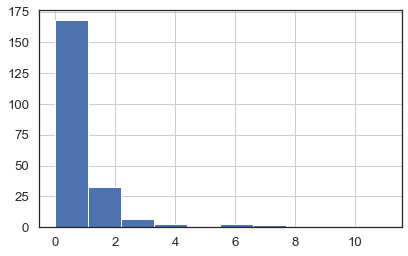

In [57]:
output["num_matching_isoforms"] = [len(a) for a in output["matching_isoforms"]]
output["num_matching_isoforms"].hist()

In [58]:
output[output["GeneName"].str.contains("STAT2")]

,index,GeneName,AD name,Start,End,uniprotID,Reference,Sequence,orig_uniprotID,matching_isoforms,num_matching_isoforms
13,13,STAT2,TAD,769,851,P52630,"Wojciak, J., Martinez-Yamout, M., Dyson, H., W...",MVSQTVPEPDQGPVSQPVPEPDLPCDLRHLNTEPMEIFRNCVKIEE...,P52630,[P52630],1
14,14,STAT2,TAD-NMR,786,838,P52630,"Lindström, I., Dogan, J. (2017). Native Hydrop...",VPEPDLPHDLRHLNTEPMEIFRNSVKIEEIMPNGDPLLAGQNTVDE...,P52630,[],0


In [59]:
no_isoform_matches = output[[a == [] for a in output["matching_isoforms"]]]
no_isoform_matches

,index,GeneName,AD name,Start,End,uniprotID,Reference,Sequence,orig_uniprotID,matching_isoforms,num_matching_isoforms
14,14,STAT2,TAD-NMR,786,838,P52630,"Lindström, I., Dogan, J. (2017). Native Hydrop...",VPEPDLPHDLRHLNTEPMEIFRNSVKIEEIMPNGDPLLAGQNTVDE...,P52630,[],0
19,19,p65,Cterm-NMR,521,551,P04637,NaN,GSPGYPNGLLSGDEDFSSIADMDFSALLSQISS,P04637,[],0
30,30,KMT2A/MLL1/CXXC7,Zinc,2885,2915,Q03164,Choi 2000 list,SDDGNILPSDIMDFVLKNTPSMQALGESPES,Q03164,[],0
41,41,NFAT1,NaN,1,96,Q13469,Choi 2000 list,MNAPERQPQPDGGDAPGHEPGGSPQDELDFSILFDYEYLNPNEEEP...,Q13469,[],0
49,49,PLAG1,NaN,385,466,Q6DJT9,Choi 2000 list,DPQIGSLDDGAGDLSLSKSSISISDPLNTPALDFSQLFNFIPLNGP...,Q6DJT9,[],0
75,75,SOX-2,NaN,204,317,P48431,Choi 2000 list,ALQYNSMTSSQTYMNGSPTYSMSYSQQGTPGMALGSMGSVVKSEAS...,P48431,[],0
76,76,AP-2,NaN,8,119,Q96CW1,Choi 2000 list,TDNIKYEDCEDRHDGTSNGTARLPQLGTVGQSPYTSAPPLSHTPNA...,Q96CW1,[],0


In [60]:
2915 - 2885 + 2837 - 1

2866

In [61]:
# VP16 start is actually 415 to 453
output.at[4, 'Start'] = 415
output.at[4, 'End'] = 453

# Fixing uniprotID of p65
output.at[18, 'uniprotID'] = "Q04206"

# Dropping NMR
output = output.drop(labels = [14, 19], axis = 0)

# Zinc: Uniprot looks like the sequence should be SDDCGNILPSDIMDFVLKNTPSMQALGESPES, not SDDGNILPSDIMDFVLKNTPSMQALGESPES
# And coordinates should be 2838 to 2869
output.at[30, 'Start'] = 2838
output.at[30, 'End'] = 2869
output.at[30, 'Sequence'] = "SDDCGNILPSDIMDFVLKNTPSMQALGESPES"

# NFAT1: looks like sequence should be MNAPERQPQPDGGDAPGHEPGGSPQDELDFSILFDYEYLNPNEEEPNAHKVASPPSGPAYPDDVLDYGLKPYSPLASLSGEPPGRFGEPDRVGPQK
output.at[41, 'Sequence'] = "MNAPERQPQPDGGDAPGHEPGGSPQDELDFSILFDYEYLNPNEEEPNAHKVASPPSGPAYPDDVLDYGLKPYSPLASLSGEPPGRFGEPDRVGPQK"

# PLAG1: looks like sequence should be DPQIGSLDDGAGDLSLSKSSISISDPLNTPALDFSQLFNFIPLNGPPYNPLSVGSLGMSYSQEEAHSSVSQLPPQTQDLQDP
output.at[49, 'Sequence'] = "DPQIGSLDDGAGDLSLSKSSISISDPLNTPALDFSQLFNFIPLNGPPYNPLSVGSLGMSYSQEEAHSSVSQLPPQTQDLQDP"

# SOX-2: looks like sequence should be ALQYNSMTSSQTYMNGSPTYSMSYSQQGTPGMALGSMGSVVKSEASSSPPVVTSSSHSRAPCQAGDLRDMISMYLPGAEVPEPAAPSRLHMSQHYQSGPVPGTAINGTLPLSHM
output.at[75, 'Sequence'] = 'ALQYNSMTSSQTYMNGSPTYSMSYSQQGTPGMALGSMGSVVKSEASSSPPVVTSSSHSRAPCQAGDLRDMISMYLPGAEVPEPAAPSRLHMSQHYQSGPVPGTAINGTLPLSHM'

# AP-2: UniprotID is actually P05549
# Coordinates are actually 6 to 117
output.at[76, 'uniprotID'] = 'P05549'
output.at[76, 'Start'] = 6
output.at[76, 'End'] = 117

In [62]:
output[[a == [] for a in output["matching_isoforms"]]]

,index,GeneName,AD name,Start,End,uniprotID,Reference,Sequence,orig_uniprotID,matching_isoforms,num_matching_isoforms
30,30,KMT2A/MLL1/CXXC7,Zinc,2838,2869,Q03164,Choi 2000 list,SDDCGNILPSDIMDFVLKNTPSMQALGESPES,Q03164,[],0
41,41,NFAT1,NaN,1,96,Q13469,Choi 2000 list,MNAPERQPQPDGGDAPGHEPGGSPQDELDFSILFDYEYLNPNEEEP...,Q13469,[],0
49,49,PLAG1,NaN,385,466,Q6DJT9,Choi 2000 list,DPQIGSLDDGAGDLSLSKSSISISDPLNTPALDFSQLFNFIPLNGP...,Q6DJT9,[],0
75,75,SOX-2,NaN,204,317,P48431,Choi 2000 list,ALQYNSMTSSQTYMNGSPTYSMSYSQQGTPGMALGSMGSVVKSEAS...,P48431,[],0
76,76,AP-2,NaN,6,117,P05549,Choi 2000 list,TDNIKYEDCEDRHDGTSNGTARLPQLGTVGQSPYTSAPPLSHTPNA...,Q96CW1,[],0


In [63]:
# Adding the sequence of P05549 to the isoform df
isoform_df.loc[len(isoform_df.index)] = ['sp|P05549|AP2A_HUMAN Transcription factor AP-2-alpha OS=Homo sapiens OX=9606 GN=TFAP2A PE=1 SV=1', 
                                 'MLWKLTDNIKYEDCEDRHDGTSNGTARLPQLGTVGQSPYTSAPPLSHTPNADFQPPYFPPPYQPIYPQSQDPYSHVNDPYSLNPLHAQPQPQHPGWPGQRQSQESGLLHTHRGLPHQLSGLDPRRDYRRHEDLLHGPHALSSGLGDLSIHSLPHAIEEVPHVEDPGINIPDQTVIKKGPVSLSKSNSNAVSAIPINKDNLFGGVVNPNEVFCSVPGRLSLLSSTSKYKVTVAEVQRRLSPPECLNASLLGGVLRRAKSKNGGRSLREKLDKIGLNLPAGRRKAANVTLLTSLVEGEAVHLARDFGYVCETEFPAKAVAEFLNRQHSDPNEQVTRKNMLLATKQICKEFTDLLAQDRSPLGNSRPNPILEPGIQSCLTHFNLISHGFGSPAVCAAVTALQNYLTEALKAMDKMYLSNNPNSHTDNNAKSSDKEEKHRK',
                                "P05549"] 
isoform_df

,id,seq,uniprotID
0,sp|O00470|MEIS1_HUMAN Homeobox protein Meis1 O...,MAQRYDDLPHYGGMDGVGIPSTMYGDPHAARSMQPVHHLNHGPPLH...,O00470
1,sp|O00470-2|MEIS1_HUMAN Isoform 2 of Homeobox ...,MQYDDLPHYGGMDGVGIPSTMYGDPHAARSMQPVHHLNHGPPLHSH...,O00470-2
2,sp|O00716|E2F3_HUMAN Transcription factor E2F3...,MRKGIQPALEQYLVTAGGGEGAAVVAAAAAASMDKRALLASPGFAA...,O00716
3,sp|O00716-2|E2F3_HUMAN Isoform 2 of Transcript...,MPLQQQAKRRLELGESGHQYLSDGLKTPKGKGRAALRSPDSPKKKT...,O00716-2
4,sp|O14770|MEIS2_HUMAN Homeobox protein Meis2 O...,MAQRYDELPHYGGMDGVGVPASMYGDPHAPRPIPPVHHLNHGPPLH...,O14770
...,...,...,...
441,sp|Q9Y2N7-5|HIF3A_HUMAN Isoform 5 of Hypoxia-i...,MRLTISYLRMHRLCAAGEWNQVGAGGEPLDACYLKALEGFVMVLTA...,Q9Y2N7-5
442,sp|Q9Y2N7-6|HIF3A_HUMAN Isoform 6 of Hypoxia-i...,MRPAAGAARRPRCCTSWLTRCPSPAASAPTWTRPLSCASPSATCAC...,Q9Y2N7-6
443,sp|Q9Y2N7-7|HIF3A_HUMAN Isoform 7 of Hypoxia-i...,MRPAAGAARRPRCCTSWLTRCPSPAASAPTWTRPLSCASPSATCAC...,Q9Y2N7-7
444,sp|P05549|AP2A_HUMAN Transcription factor AP-2...,MLWKLTDNIKYEDCEDRHDGTSNGTARLPQLGTVGQSPYTSAPPLS...,P05549


In [64]:
isoform_df

,id,seq,uniprotID
0,sp|O00470|MEIS1_HUMAN Homeobox protein Meis1 O...,MAQRYDDLPHYGGMDGVGIPSTMYGDPHAARSMQPVHHLNHGPPLH...,O00470
1,sp|O00470-2|MEIS1_HUMAN Isoform 2 of Homeobox ...,MQYDDLPHYGGMDGVGIPSTMYGDPHAARSMQPVHHLNHGPPLHSH...,O00470-2
2,sp|O00716|E2F3_HUMAN Transcription factor E2F3...,MRKGIQPALEQYLVTAGGGEGAAVVAAAAAASMDKRALLASPGFAA...,O00716
3,sp|O00716-2|E2F3_HUMAN Isoform 2 of Transcript...,MPLQQQAKRRLELGESGHQYLSDGLKTPKGKGRAALRSPDSPKKKT...,O00716-2
4,sp|O14770|MEIS2_HUMAN Homeobox protein Meis2 O...,MAQRYDELPHYGGMDGVGVPASMYGDPHAPRPIPPVHHLNHGPPLH...,O14770
...,...,...,...
441,sp|Q9Y2N7-5|HIF3A_HUMAN Isoform 5 of Hypoxia-i...,MRLTISYLRMHRLCAAGEWNQVGAGGEPLDACYLKALEGFVMVLTA...,Q9Y2N7-5
442,sp|Q9Y2N7-6|HIF3A_HUMAN Isoform 6 of Hypoxia-i...,MRPAAGAARRPRCCTSWLTRCPSPAASAPTWTRPLSCASPSATCAC...,Q9Y2N7-6
443,sp|Q9Y2N7-7|HIF3A_HUMAN Isoform 7 of Hypoxia-i...,MRPAAGAARRPRCCTSWLTRCPSPAASAPTWTRPLSCASPSATCAC...,Q9Y2N7-7
444,sp|P05549|AP2A_HUMAN Transcription factor AP-2...,MLWKLTDNIKYEDCEDRHDGTSNGTARLPQLGTVGQSPYTSAPPLS...,P05549


In [65]:
output[output["uniprotID"] == "Q03164"]

,index,GeneName,AD name,Start,End,uniprotID,Reference,Sequence,orig_uniprotID,matching_isoforms,num_matching_isoforms
30,30,KMT2A/MLL1/CXXC7,Zinc,2838,2869,Q03164,Choi 2000 list,SDDCGNILPSDIMDFVLKNTPSMQALGESPES,Q03164,[],0
82,82,KMT2A/ALL1/HRX,NaN,2832,2886,Q03164,Choi 2000 list,LKSDSDNNNSDDCGNILPSDIMDFVLKNTPSMQALGESPESSSSEL...,Q03164,[Q03164-3],1


In [66]:
output_2 = return_uniprotID_isoform_mappings(output, isoform_df)
output_2

,index,GeneName,AD name,Start,End,uniprotID,Reference,Sequence,orig_uniprotID,matching_isoforms,num_matching_isoforms
0,0,OTX2,Cterm,231,289,P32243,uniprot,LNQSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFNADCLD...,P32243,[P32243],1
1,1,CRX,Cterm,200,284,O43186,Chen 2002 pg 873,AFCSSPSAYGSPSSYFSGLDPYLSPMVPQLGGPALSPLSGPSVGPS...,O43186,[O43186],1
2,2,VP16,Full,411,490,P06492,NaN,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG...,P06492,[P06492],1
3,3,VP16,H1,411,456,P06492,NaN,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG,P06492,[P06492],1
4,4,VP16,MVS N_C (acid blob library fragment,415,453,P06492,NaN,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,P06492,[P06492],1
...,...,...,...,...,...,...,...,...,...,...,...
213,125,NR3C1,NaN,98,115,P04150,transcriptionalactivity_regions.txt,MGNDLGFPQQGQISLSSG,P04150,"[P04150, P04150-10, P04150-2, P04150-3, P04150...",7
214,126,SOX11,NaN,409,441,P35716,transcriptionalactivity_regions.txt,SHFEFPDYCTPELSEMIAGDWLEANFSDLVFTY,P35716,[P35716],1
215,127,AHR,NaN,118,126,P35869,transcriptionalactivity_regions.txt,LLQALNGFV,P35869,[P35869],1
216,128,AHR,NaN,266,268,P35869,transcriptionalactivity_regions.txt,FAI,P35869,[P35869],1


In [67]:
output_2["old_uniprotID"] = output_2["uniprotID"]
output_2["uniprotID"] = [a[0] for a in output_2["matching_isoforms"]]
output_2

,index,GeneName,AD name,Start,End,uniprotID,Reference,Sequence,orig_uniprotID,matching_isoforms,num_matching_isoforms,old_uniprotID
0,0,OTX2,Cterm,231,289,P32243,uniprot,LNQSPASLSTQGYGASSLGFNSTTDCLDYKDQTASWKLNFNADCLD...,P32243,[P32243],1,P32243
1,1,CRX,Cterm,200,284,O43186,Chen 2002 pg 873,AFCSSPSAYGSPSSYFSGLDPYLSPMVPQLGGPALSPLSGPSVGPS...,O43186,[O43186],1,O43186
2,2,VP16,Full,411,490,P06492,NaN,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG...,P06492,[P06492],1,P06492
3,3,VP16,H1,411,456,P06492,NaN,STAPPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSPGPG,P06492,[P06492],1,P06492
4,4,VP16,MVS N_C (acid blob library fragment,415,453,P06492,NaN,PTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,P06492,[P06492],1,P06492
...,...,...,...,...,...,...,...,...,...,...,...,...
213,125,NR3C1,NaN,98,115,P04150,transcriptionalactivity_regions.txt,MGNDLGFPQQGQISLSSG,P04150,"[P04150, P04150-10, P04150-2, P04150-3, P04150...",7,P04150
214,126,SOX11,NaN,409,441,P35716,transcriptionalactivity_regions.txt,SHFEFPDYCTPELSEMIAGDWLEANFSDLVFTY,P35716,[P35716],1,P35716
215,127,AHR,NaN,118,126,P35869,transcriptionalactivity_regions.txt,LLQALNGFV,P35869,[P35869],1,P35869
216,128,AHR,NaN,266,268,P35869,transcriptionalactivity_regions.txt,FAI,P35869,[P35869],1,P35869


In [68]:
output_2[output_2["uniprotID"].str.contains("-")]

,index,GeneName,AD name,Start,End,uniprotID,Reference,Sequence,orig_uniprotID,matching_isoforms,num_matching_isoforms,old_uniprotID
9,9,Oct2,AD2,422,463,P09086-3,Choi 2000 list,PPPATTNSTNPSPQGSHSAIGLSGLNPSTGPGLWWNPAPYQP,P09086,[P09086-3],1,P09086
50,50,RUNX1/AML1,NaN,318,358,Q01196-8,Choi 2000 list,SSRLSTAPDLTAFSDPRQFPALPSISDPRMHYPGAFTYSPT,Q01196,[Q01196-8],1,Q01196
56,56,c-ETS1,NaN,175,286,P14921-3,Choi 2000 list,ILQKEDVKPYQVNGVNPAYPESRYTSDYFISYGIEHAQCVPPSEFS...,P14921,[P14921-3],1,P14921
64,64,RBTN-2,NaN,80,98,P25791-3,Choi 2000 list,DPSEEPVDEVLQIPPSLLT,P25791,[P25791-3],1,P25791
69,69,FOXA2/HNF3B,NaN,367,463,Q9Y261-2,Choi 2000 list,EAHLKPEHHYAFNHPFSINNLMSSEQQHHHSHHHHQPHKMDLKAYE...,Q9Y261,[Q9Y261-2],1,Q9Y261
71,71,MYC,NaN,1,144,P01106-1,Choi 2000 list,MPLNVSFTNRNYDLDYDSVQPYFYCDEEENFYQQQQQSELQPPAPS...,P01106,[P01106-1],1,P01106
72,72,MYC,NaN,1,88,P01106-1,PMID: 22457068 PMCID: PMC3401448 DOI: 10.109...,MPLNVSFTNRNYDLDYDSVQPYFYCDEEENFYQQQQQSELQPPAPS...,P01106,[P01106-1],1,P01106
82,82,KMT2A/ALL1/HRX,NaN,2832,2886,Q03164-3,Choi 2000 list,LKSDSDNNNSDDCGNILPSDIMDFVLKNTPSMQALGESPESSSSEL...,Q03164,[Q03164-3],1,Q03164
139,51,ATF7,NaN,1,296,P17544-1,activation_regions.txt,MGDDRPFVCNAPGCGQRFTNEDHLAVHKHKHEMTLKFGPARTDSVI...,P17544,[P17544-1],1,P17544


In [75]:
dfs = []
i = 0
for uniprotID in output_2["uniprotID"].unique():
    dfs.append(return_merged_row(uniprotID, output_2))
    
GSL = pd.concat(dfs)
GSL = GSL.sort_values(by = "uniprotID")
GSL.reset_index(inplace= True,drop=True)
GSL

,Gene,Start,End,uniprotID,Matching Isoforms,orig_uniprotID,Reference
0,MEIS1,335,390,O00470,"[[O00470], [O00470]]",O00470 / O00470,R4TA_regions.txt / activation_regions.txt
1,E2F3,391,465,O00716,[[O00716]],O00716,activation_regions.txt
2,MEIS2,340,477,O14770,[[O14770]],O14770,activation_regions.txt
3,TFEC,1,119,O14948,[[O14948]],O14948,activation_regions.txt
4,TFEC,271,347,O14948,[[O14948]],O14948,activation_regions.txt
...,...,...,...,...,...,...,...
165,DMTF1,87,170,Q9Y222,"[[Q9Y222, Q9Y222-2, Q9Y222-3], [Q9Y222, Q9Y222...",Q9Y222 / Q9Y222,R4TA_regions.txt / activation_regions.txt
166,FOXA2,14,93,Q9Y261,[[Q9Y261]],Q9Y261,activation_regions.txt
167,FOXA2,361,457,Q9Y261,[[Q9Y261]],Q9Y261,activation_regions.txt
168,FOXA2/HNF3B,367,463,Q9Y261-2,[[Q9Y261-2]],Q9Y261,Choi 2000 list


In [76]:
GSL = GSL.rename(columns = {"Gene": "GeneName"})
GSL

,GeneName,Start,End,uniprotID,Matching Isoforms,orig_uniprotID,Reference
0,MEIS1,335,390,O00470,"[[O00470], [O00470]]",O00470 / O00470,R4TA_regions.txt / activation_regions.txt
1,E2F3,391,465,O00716,[[O00716]],O00716,activation_regions.txt
2,MEIS2,340,477,O14770,[[O14770]],O14770,activation_regions.txt
3,TFEC,1,119,O14948,[[O14948]],O14948,activation_regions.txt
4,TFEC,271,347,O14948,[[O14948]],O14948,activation_regions.txt
...,...,...,...,...,...,...,...
165,DMTF1,87,170,Q9Y222,"[[Q9Y222, Q9Y222-2, Q9Y222-3], [Q9Y222, Q9Y222...",Q9Y222 / Q9Y222,R4TA_regions.txt / activation_regions.txt
166,FOXA2,14,93,Q9Y261,[[Q9Y261]],Q9Y261,activation_regions.txt
167,FOXA2,361,457,Q9Y261,[[Q9Y261]],Q9Y261,activation_regions.txt
168,FOXA2/HNF3B,367,463,Q9Y261-2,[[Q9Y261-2]],Q9Y261,Choi 2000 list


In [77]:
GSL_with_seqs = pd.merge(GSL, isoform_df, on = "uniprotID", how = "left")
GSL_with_seqs["Sequence"] = [seq[start - 1: end] for seq, start, end in zip(GSL_with_seqs["seq"],
                                                                     GSL_with_seqs["Start"],
                                                                     GSL_with_seqs["End"])]
GSL_with_seqs

,GeneName,Start,End,uniprotID,Matching Isoforms,orig_uniprotID,Reference,id,seq,Sequence
0,MEIS1,335,390,O00470,"[[O00470], [O00470]]",O00470 / O00470,R4TA_regions.txt / activation_regions.txt,sp|O00470|MEIS1_HUMAN Homeobox protein Meis1 O...,MAQRYDDLPHYGGMDGVGIPSTMYGDPHAARSMQPVHHLNHGPPLH...,IDQSNRAVSQGTPYNPDGQPMGGFVMDGQQHMGIRAPGPMSGMGMN...
1,E2F3,391,465,O00716,[[O00716]],O00716,activation_regions.txt,sp|O00716|E2F3_HUMAN Transcription factor E2F3...,MRKGIQPALEQYLVTAGGGEGAAVVAAAAAASMDKRALLASPGFAA...,SVSMGNLSPLASPANLLQQTEDQIPSNLEGPFVNLLPPLLQEDYLL...
2,MEIS2,340,477,O14770,[[O14770]],O14770,activation_regions.txt,sp|O14770|MEIS2_HUMAN Homeobox protein Meis2 O...,MAQRYDELPHYGGMDGVGVPASMYGDPHAPRPIPPVHHLNHGPPLH...,DQSNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQ...
3,TFEC,1,119,O14948,[[O14948]],O14948,activation_regions.txt,sp|O14948|TFEC_HUMAN Transcription factor EC O...,MTLDHQIINPTLKWSQPAVPSGGPLVQHAHTTLDSDAGLTENPLTK...,MTLDHQIINPTLKWSQPAVPSGGPLVQHAHTTLDSDAGLTENPLTK...
4,TFEC,271,347,O14948,[[O14948]],O14948,activation_regions.txt,sp|O14948|TFEC_HUMAN Transcription factor EC O...,MTLDHQIINPTLKWSQPAVPSGGPLVQHAHTTLDSDAGLTENPLTK...,PSPELCDQAIAFSDPLSYFTDLSFSAALKEEQRLDGMLLDDTISPF...
...,...,...,...,...,...,...,...,...,...,...
166,DMTF1,87,170,Q9Y222,"[[Q9Y222, Q9Y222-2, Q9Y222-3], [Q9Y222, Q9Y222...",Q9Y222 / Q9Y222,R4TA_regions.txt / activation_regions.txt,sp|Q9Y222|DMTF1_HUMAN Cyclin-D-binding Myb-lik...,MSTVEEDSDTVTVETVNSVTLTQDTEGNLILHCPQNEADEIDSEDS...,VTMTATTEVADDEVTEGTVTQIQILQNEQLDEISPLGNEEVSAVSQ...
167,FOXA2,14,93,Q9Y261,[[Q9Y261]],Q9Y261,activation_regions.txt,sp|Q9Y261|FOXA2_HUMAN Hepatocyte nuclear facto...,MLGAVKMEGHEPSDWSSYYAEPEGYSSVSNMNAGLGMNGMNTYMSM...,DWSSYYAEPEGYSSVSNMNAGLGMNGMNTYMSMSAAAMGSGSGNMS...
168,FOXA2,361,457,Q9Y261,[[Q9Y261]],Q9Y261,activation_regions.txt,sp|Q9Y261|FOXA2_HUMAN Hepatocyte nuclear facto...,MLGAVKMEGHEPSDWSSYYAEPEGYSSVSNMNAGLGMNGMNTYMSM...,EAHLKPEHHYAFNHPFSINNLMSSEQQHHHSHHHHQPHKMDLKAYE...
169,FOXA2/HNF3B,367,463,Q9Y261-2,[[Q9Y261-2]],Q9Y261,Choi 2000 list,sp|Q9Y261-2|FOXA2_HUMAN Isoform 2 of Hepatocyt...,MHSASSMLGAVKMEGHEPSDWSSYYAEPEGYSSVSNMNAGLGMNGM...,EAHLKPEHHYAFNHPFSINNLMSSEQQHHHSHHHHQPHKMDLKAYE...


In [78]:
# GSL_with_seqs = GSL_with_seqs[['GeneName', 'Start', 'End', 'uniprotID',
#        'Reference', 'Sequence']]
GSL_with_seqs = GSL_with_seqs.drop(columns = ["id", "seq"])
GSL_with_seqs["Length"] = GSL_with_seqs["End"].astype(int) - GSL_with_seqs["Start"].astype(int) + 1
GSL_with_seqs

,GeneName,Start,End,uniprotID,Matching Isoforms,orig_uniprotID,Reference,Sequence,Length
0,MEIS1,335,390,O00470,"[[O00470], [O00470]]",O00470 / O00470,R4TA_regions.txt / activation_regions.txt,IDQSNRAVSQGTPYNPDGQPMGGFVMDGQQHMGIRAPGPMSGMGMN...,56
1,E2F3,391,465,O00716,[[O00716]],O00716,activation_regions.txt,SVSMGNLSPLASPANLLQQTEDQIPSNLEGPFVNLLPPLLQEDYLL...,75
2,MEIS2,340,477,O14770,[[O14770]],O14770,activation_regions.txt,DQSNRAGFLLDPSVSQGAAYSPEGQPMGSFVLDGQQHMGIRPAGLQ...,138
3,TFEC,1,119,O14948,[[O14948]],O14948,activation_regions.txt,MTLDHQIINPTLKWSQPAVPSGGPLVQHAHTTLDSDAGLTENPLTK...,119
4,TFEC,271,347,O14948,[[O14948]],O14948,activation_regions.txt,PSPELCDQAIAFSDPLSYFTDLSFSAALKEEQRLDGMLLDDTISPF...,77
...,...,...,...,...,...,...,...,...,...
166,DMTF1,87,170,Q9Y222,"[[Q9Y222, Q9Y222-2, Q9Y222-3], [Q9Y222, Q9Y222...",Q9Y222 / Q9Y222,R4TA_regions.txt / activation_regions.txt,VTMTATTEVADDEVTEGTVTQIQILQNEQLDEISPLGNEEVSAVSQ...,84
167,FOXA2,14,93,Q9Y261,[[Q9Y261]],Q9Y261,activation_regions.txt,DWSSYYAEPEGYSSVSNMNAGLGMNGMNTYMSMSAAAMGSGSGNMS...,80
168,FOXA2,361,457,Q9Y261,[[Q9Y261]],Q9Y261,activation_regions.txt,EAHLKPEHHYAFNHPFSINNLMSSEQQHHHSHHHHQPHKMDLKAYE...,97
169,FOXA2/HNF3B,367,463,Q9Y261-2,[[Q9Y261-2]],Q9Y261,Choi 2000 list,EAHLKPEHHYAFNHPFSINNLMSSEQQHHHSHHHHQPHKMDLKAYE...,97


In [81]:
GSL_with_seqs.to_csv("../output/GSL_with_isoforms.csv")